In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [2]:
# 싸이킷 런의 유방암(Breast Cancer Wisconsin) 데이터 셋을 이용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Breast Cancer Wisconsin의 상세 Description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Breast Cancer Data의 Shape 확인
# 30 Column의 진단항목에 대한 개별 결과, 569 Row의 Data 건수
cancer.data.shape

# 569 Row의 결과 Data (0:악성(M), 1:양성(B))
cancer.target.shape

(569, 30)

(569,)

In [15]:
from keras import models
from keras import layers

# 앞서와 마찬가지로 선형적으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

# 입력층 : 입력 parameter는 30이고(30가지 진단항목), 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))

# 은닉층 : 입력 parameter는 16이고, 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu'))

# 출력층 : 입력 parameter는 16이고, 출력 parameter는 1 임, 활성화 함수는 sigmoid
# 주로 Binary Classification의 경우는 'Sigmoid', Multi-Classification의 경우는 'Softmax' 활성화 함수 이용
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 Adagrad를 사용해 보았고, Binary Classification 이므로 손실함수는 'binary_crossentropy'를 사용

model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# 전제 569 Set의 Data 중에서 다음과 같이 분할하였음, Label도 동일 함
#  - 150 Set : Validation Data
#  - 250 Set : Training Data
#  - 169 Set : Test Data

x_val = cancer.data[:150]
partial_x_train = cancer.data[150:400]
x_test = cancer.data[401:]

y_val = cancer.target[:150]
partial_y_train = cancer.target[150:400]
y_test = cancer.target[401:]

In [7]:
# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 Training Data(partial_x_train)과 Validation Data(x_val)을 주입하고, epoch, batch size 지정

history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))


Train on 250 samples, validate on 150 samples
Epoch 1/50
250/250 [==============================] - 0s 578us/step - loss: 12.3294 - accuracy: 0.5480 - val_loss: 5.5085 - val_accuracy: 0.5533
Epoch 2/50
250/250 [==============================] - 0s 31us/step - loss: 3.6904 - accuracy: 0.5960 - val_loss: 2.9157 - val_accuracy: 0.5533
Epoch 3/50
250/250 [==============================] - 0s 32us/step - loss: 1.8663 - accuracy: 0.6640 - val_loss: 0.4791 - val_accuracy: 0.7800
Epoch 4/50
250/250 [==============================] - 0s 31us/step - loss: 0.3713 - accuracy: 0.8840 - val_loss: 0.2851 - val_accuracy: 0.8933
Epoch 5/50
250/250 [==============================] - 0s 36us/step - loss: 0.3653 - accuracy: 0.9000 - val_loss: 0.2794 - val_accuracy: 0.9267
Epoch 6/50
250/250 [==============================] - 0s 30us/step - loss: 0.3813 - accuracy: 0.8920 - val_loss: 0.3341 - val_accuracy: 0.9000
Epoch 7/50
250/250 [==============================] - 0s 30us/step - loss: 0.3274 - accuracy:

In [8]:
model.summary()

#  dense_1 layer의 전체 paramenter의 수는 30(입력) * 16(출력) + 16 = 496 임 (추가적으로 더하는 16은 bias)
#  dense_2 layer의 전체 paramenter의 수는 16 * 16 + 16 = 272 임 (추가적으로 더하는 16은 bias)
#  dense_3 layer의 전체 paramenter의 수는 16 * 1 + 1 = 17 임 (추가적으로 더하는 1은 bias)
# 그러므로 총 paramter의 수는 496 + 272 + 17 = 785

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Training 시 생성된 정보를 저장하고 있는 history method를 이용하여 모든 val_loss, val_accuracy, loss, accuracy를 확인
history_dict = history.history
history_dict.keys()

history_dict.values()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

dict_values([[5.508493919372558, 2.9156937408447265, 0.4791220267613729, 0.2851281795899073, 0.279446551601092, 0.3340757687886556, 0.295205059448878, 0.37248541712760924, 0.2648498699069023, 0.273909862836202, 0.41956210831801094, 1.5630467009544373, 0.2830226691563924, 0.3175858638683955, 0.25986433287461597, 0.6401536444822947, 0.2632274252176285, 0.3115749172369639, 0.25401581545670826, 0.43630140046278637, 0.7924908498922983, 0.26021079301834105, 0.24776415447394054, 0.24621432840824128, 0.3983285649617513, 0.4054709633191427, 0.27659447411696114, 0.2591327726840973, 0.3344341782728831, 0.2407852550347646, 0.2994440448284149, 0.22669932146867117, 0.3241572097937266, 0.41440428972244264, 0.3102555855115255, 0.21948553780714672, 0.2337476364771525, 0.3251014331976573, 0.2262239889303843, 0.486313814719518, 0.3748764489094416, 0.2633928084373474, 0.420339678923289, 0.41541209936141965, 0.2223621686299642, 0.2396549278497696, 0.3497680221001307, 0.22467834850152332, 0.3461496661106745

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

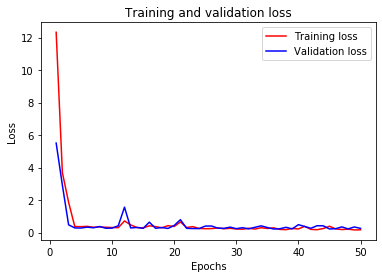

In [14]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

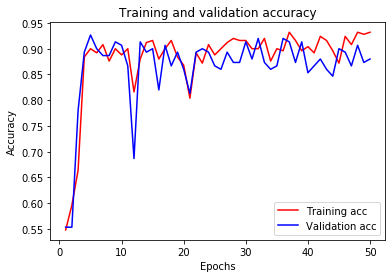

In [11]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# 7 epoch 정도 부터 Accuracy가 85~90% 사이에서 진동 함 , 앞에서와 동일하게 처음부터 다시 Network를 구성
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# fit method로 Training 시, epoch = 20로 Setting
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=64)

# evaluate method를 이용하여 입력 test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/20
250/250 [==============================] - 0s 389us/step - loss: 5.1876 - accuracy: 0.5040
Epoch 2/20
250/250 [==============================] - 0s 20us/step - loss: 0.6280 - accuracy: 0.7480
Epoch 3/20
250/250 [==============================] - 0s 21us/step - loss: 0.5084 - accuracy: 0.7920
Epoch 4/20
250/250 [==============================] - 0s 19us/step - loss: 0.5546 - accuracy: 0.8120
Epoch 5/20
250/250 [==============================] - 0s 19us/step - loss: 0.4036 - accuracy: 0.8560
Epoch 6/20
250/250 [==============================] - 0s 20us/step - loss: 0.2817 - accuracy: 0.8840
Epoch 7/20
250/250 [==============================] - 0s 22us/step - loss: 0.3218 - accuracy: 0.8720
Epoch 8/20
250/250 [==============================] - 0s 21us/step - loss: 0.2694 - accuracy: 0.8960
Epoch 9/20
250/250 [==============================] - 0s 21us/step - loss: 0.2816 - accuracy: 0.8880
Epoch 10/20
250/250 [==============================] - 0s 20us/step - loss: 0.2671 - accur

168/168 [==============================] - 0s 156us/step


In [13]:
print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.9285714030265808
test_loss :  0.2139531686192467
